In [1]:
# Graph - adjacency list representation
class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.graph = [[] for _ in range(vertices)]

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def is_safe(self, v, c, color, result):
        for neighbor in self.graph[v]:
            if color[neighbor] == c:
                return False
        return True

    def graph_coloring_util(self, m, color, v, result):
        if v == self.vertices:
            result.append(color[:])
            return True

        for c in range(1, m + 1):
            if self.is_safe(v, c, color, result):
                color[v] = c
                if self.graph_coloring_util(m, color, v + 1, result):
                    return True
                color[v] = 0

    def graph_coloring(self, m):
        color = [0] * self.vertices
        result = []
        if not self.graph_coloring_util(m, color, 0, result):
            print("Solution does not exist")
            return
        return result

    def print_graph(self):
        for i, neighbors in enumerate(self.graph):
            print("Vertex {} -> {}".format(i, neighbours))


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from random import randint
from matplotlib.colors import to_hex

In [4]:
shape_path = "/Users/Pavan/MO_2009_County_Boundaries_shp/MO_2009_County_Boundaries_shp.shp"
map = gpd.read_file(shape_path)
map.head()

,COUNTYNAME,COUNTYFIPS,COUNTYGNIS,NAME_UCASE,POP_1990,POP_2000,ACRES,SQ_MILES,CNTY_SEAT,CO_CLASS,geometry
0,Clark,045,758477,CLARK,7547,7416,327632.419997,511.925656,Kahoka,3,"POLYGON ((607502.358 4496652.029, 608193.894 4..."
1,Atchison,005,758457,ATCHISON,7457,6430,351990.513001,549.985177,Rock Port,3,"POLYGON ((313597.506 4494295.329, 313560.976 4..."
2,Scotland,199,758552,SCOTLAND,4822,4983,280948.966704,438.982760,Memphis,3,"POLYGON ((589420.877 4481054.223, 589425.499 4..."
3,Schuyler,197,758551,SCHUYLER,4236,4170,197084.747448,307.944918,Lancaster,3,"POLYGON ((554942.908 4493809.956, 554948.532 4..."
4,Nodaway,147,758528,NODAWAY,21709,21912,561734.052590,877.709457,Maryville,3,"POLYGON ((363976.890 4463934.032, 363910.774 4..."


In [5]:
# Create a graph from the map
num_states = len(map)
state_graph = Graph(num_states)

# Assume that neighboring states are connected in the graph
for i in range(num_states):
    for j in range(i + 1, num_states):
        if map.geometry[i].touches(map.geometry[j]):
            state_graph.add_edge(i, j)

# Uncomment below to see the adjacency list representation of graph            
# state_graph.print_graph()

In [6]:
# Choose the number of colors for the map
num_colors = 4

# Get the coloring result
coloring_result = state_graph.graph_coloring(num_colors)

for i, colors in enumerate(coloring_result):
    print("Coloring solution {} -> {}".format((i+1), colors))
    print('Max colors used: {}'.format(max(colors)))

Coloring solution 1 -> [1, 1, 2, 1, 2, 2, 1, 1, 2, 3, 3, 4, 3, 3, 4, 2, 1, 1, 2, 1, 2, 3, 4, 1, 3, 4, 1, 4, 2, 3, 1, 1, 2, 2, 2, 3, 4, 2, 1, 3, 2, 3, 1, 3, 1, 1, 4, 3, 2, 1, 1, 3, 1, 2, 2, 4, 2, 4, 2, 4, 3, 3, 1, 3, 1, 1, 3, 1, 2, 2, 1, 4, 3, 2, 4, 3, 4, 3, 2, 1, 1, 4, 1, 1, 2, 1, 2, 3, 2, 4, 1, 4, 4, 3, 3, 2, 1, 4, 1, 1, 3, 2, 2, 1, 2, 2, 3, 3, 2, 3, 1, 3, 1, 1, 2]
Max colors used: 4


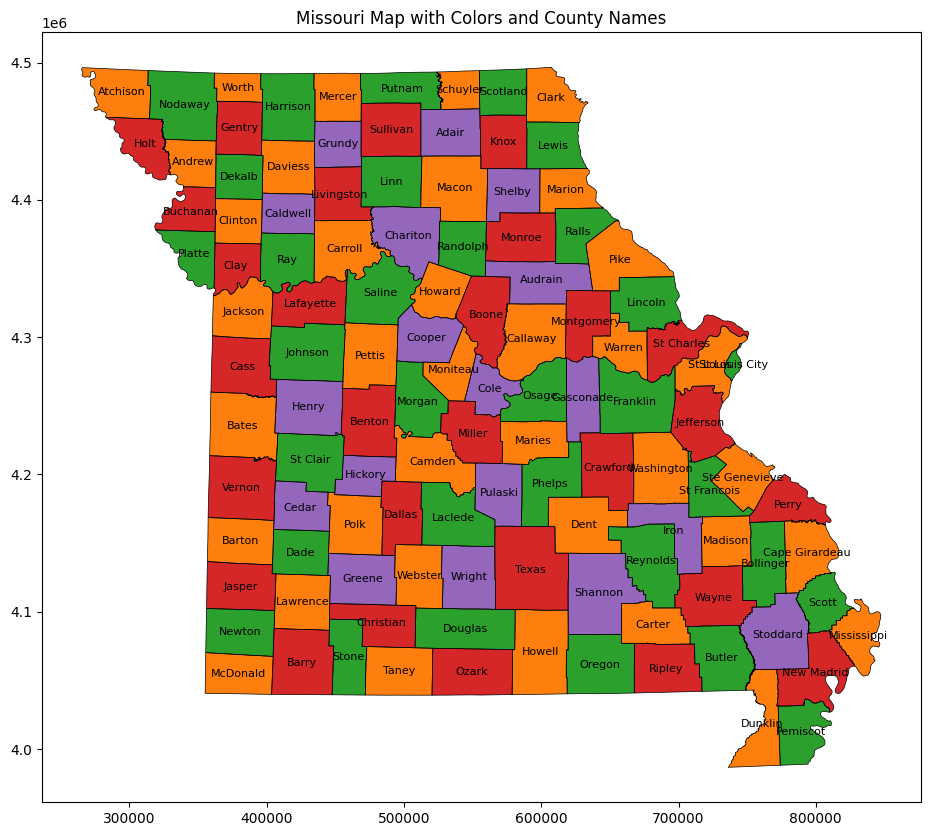

In [43]:
# Assign colors to states
state_colors = {i: to_hex(plt.cm.tab10.colors[color]) for i, color in enumerate(coloring_result[0])}

# Plot the USA map with colors
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
map.plot(ax=ax, color=[state_colors[i] for i in range(num_states)])

# Plot county shapes
map.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Plot county names
for x, y, label in zip(map.geometry.centroid.x, map.geometry.centroid.y, map['COUNTYNAME']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

ax.set_title('Missouri Map with Colors and County Names')
plt.show()